In [1]:
#Pre nego sto pocnemo da vidimo sta sve treba da uradimo:
#1. Treba da ucitamo zvucnu datoteku
#2. Treba da takav ucitani signal nacrtamo u vremenskom domenu
#3. Treba da ga potom nacrtamo u frekvencijskom domenu
#4. Potom da mu dodamo aditivni beli Gausov sum (ABGS)
#5. I na kraju da ga filtriramo LP Batervortovim filtrom

In [2]:
#Ucitavamo biblioteku numpy
#numpy je skracenica od numeric python a koristimo je za rad i manipulaciju sa nizovima
import numpy as np

In [3]:
#Ucitavamo bibliotekus scipy
#scipy je skracenica od scientific python a koristimo je kako bismo uvezli biblioteku sa funkcijama
#za rad sa digitalnim filtrima
import scipy as sp

In [4]:
#Iz biblioteke scipy uvozimo podbiblioteku signal
#Ona sadrzi funkcije kojima radimo sa digitlanim filtrima
from scipy import signal as sig

In [5]:
#Uvozimo biblioteku za iscrtavanje i rad sa graficima
import matplotlib.pyplot as plt
#Naredba matplotlib kaze Pajtonu da automatski iscrtava grafike kada pozovemo funkciju za crtanje grafika
%matplotlib inline

In [6]:
#Uvozimo biblioteku za rad sa .wav zvucnim zapisima
#Ona sadrzi funkcije za citanje/pisanje zvucnih fajlova
import soundfile as sf

In [7]:
#1. UCITAVANJE ZVUCNE BIBLIOTEKE

In [67]:
# Prvo treba da ucitamo nas .wav zvucni zapis

#Da bismo to uradili koristimo funkciju sledeceg oblika:
#amplitude, frekvencija_odabiranja = sf.read('putanja_na_racunaru_do_.wav_datoteke')
#dakle funkcija sf.read('putanja_na...') nam vraca dva podatka:

#amplitude (mi smo ga oznacili sa x):
#Ovo je niz koji sadrzi amplitude zvucnog zapisa (u obliku brojeva)
#Ovde treba paziti da ukoliko je .wav zvucni zapis dvokanalni (a u nasem slucaju je bas tako)
#onda moramo da u kasnijoj obradi zvucnog zapisa odaberemo samo jedan kanal


#frekvencija_odabiranja (mi smo je oznacili sa Fs (s je od sampling - odabiranje):
#Ova informacija nam je jako vazna jer nam govori o tome sa kolikom frekvencijom
#je izvrseno odabiranje naseg zvucnog zapisa
#Uz pomoc ove informacije mozemo ispravno da iz odabiranog zvucnog zapisa
#kasnije ponovo rekonstruisemo originalni analogni signal koji reprodukujemo
#na zvucnicima.

x, Fs = sf.read('C:\WAV.wav')

In [68]:
#Sada nas zanima sta je zapravo x. Malopre smo rekli da je u pitanju niz (array) i sledecom
#naredbom se uveravamo da je zaista tako
x

array([[  9.15527344e-04,   1.49536133e-03],
       [  8.54492188e-04,   1.58691406e-03],
       [  9.15527344e-04,   1.55639648e-03],
       ..., 
       [ -6.10351562e-05,  -3.05175781e-05],
       [ -3.05175781e-05,   3.05175781e-05],
       [ -3.05175781e-05,   3.05175781e-05]])

In [69]:
#Medjutim, rekli smo da moramo da pazimo da nam niz koji nam je funkcija sf.read('Putanja...') vratila
#ne budu zapravo dva niza u okviru jednog (jedan niz za levi, i jedan niz za desni kanal zvucnog zapisa).
#Da bismo proverili kako zaista izgleda x (tj. kog je oblika) koristimo sledecu naredbu:

x.shape

#Naredba x.shape nam vraca ovu informaciju:

(242550, 2)

In [11]:
#Sta nam ona kazuje? Kazuje nam da se niz x sastoji od dva niza (2) duzine (242550) elemenata.
#Zakljucujemo da su u pitanju dva kanala bas kako smo i pretpostavili.

In [12]:
#Moramo da izdvojimo samo jedan kanal. Na primer, mi cemo da izdvojimo samo levi kanal.
#To cinimo tako sto cemo da iskopiramo jedan od dva niza iz x i da ga upisemo u novi niz koji
#cemo da nazovemo zvuk.
#Da bismo ovo uradili koristimo sledecu naredbu:

zvuk = x[:,0]

#pisanjem x[:,0] cinimo dve stvari:
#1. pisanjem znaka : kazujemo Pajtonu da odabere sve elemente niza
#2. pisanjem 0 kazujemo Pajtonu da odabere prvi niz od dva koji su smesteni u x.

#Da rezimiramo, Pajtonu kazmo ovo:
#Uzmi prvi niz, selektuj sve njegove elemente i upisi ga u nov niz zvuk.
#Da smo na primer umesto 0 napisali 1, tada bi Pajton uzeo sve elemente iz drugog niza od dva sadrzana u x i
#iskopirao ga u nov niz zvuk.

In [13]:
#Proveravamo da li smo odabrali samo prvi kanal:
zvuk.shape

(242550,)

In [14]:
#2 ISCRTAVANJE ZVUCNOG SIGNALA U VREMENSKOM DOMENU

In [15]:
#Posto smo uspeli da u nas niz zvuk iskopiramo samo levi kanal naseg zvucnog zapisa, sada 
#treba da napravimo vremensku osu.

#Za to koristimo naredbu np.arange(duzina)
#Ova naredba nam vraca niz brojeva koji se uvecavaju za +1 do vrednosti duzina.
#Na primer, naredba np.arange(5) vraca:
#array([0, 1, 2, 3, 4])

#Posto mi treba da napravimo vremensku osu, ona mora da bude iste duzine kao i zvuk.
#Pritom, vremensku osu delimo sa Fs i takvu je upisujemo u niz t.

#OBJASNJENJE ZA DELJENJE SA FS:
#Uzmimo da smo nas zvuk odabirali frekvencijom Fs = 2Hz (2 puta u sekundi). Neka nam se rezultat tog odabiranja nalazi
#u nizu zvuk=[1, 2, 3, 4, 5, 6]. Dakle, na primer, ako je protekla 1s, sistem je dva puta uzeo odbirak naseg signala
#i upisao ih u niz zvuk. Recimo za vreme t = 1s u niz zvuk upisane su dve vrednosti: 1 i 2. Od t = 1s do t = 2s u niz
#zvuk su upisane vrednosti 3 i 4 itd. Mi sada u Pajtonu treba da napravimo vremensku osu t ali tako da svaka tacka u tom
#nizu odgovara po jednoj odabiranoj vrednosti. Dakle zanima nas koja je bila vrednost vremena kada je uzet odbirak amplitude
#1, pa vreme za 2, pa vreme za 3 i tako sve do kraja naseg niza zvuk. Posto znamo da sistem odabira dva puta u sekundi to 
#znaci npr. da je sistem u 1/2s uzorkovao i detektovao 1 i nju upisao u niz zvuk. U sledecih 1/2 sekunde je ponovo uzorkovao
#i detektovao vrednost 2 koju je upisao u niz zvuk. Da bismo napravili nasu vremensku osu stoga treba prvo da napravimo
#,,obicno`` vreme. Naredba np.arange(len(zvuk)) ce nam dati izlaz tj. niz [0, 1, 2, 3, 4, 5,..., 242549]. Posto su ovo vremenski 
#trenuci u kojima je vec dvaput izvrseno odabiranje (dva puta za 1 sekundu) to znaci da svaku od ovih tacaka treba da podelimo
#sa 2 (tj. u opstem slucaju sa Fs). Stoga pisemo:

t = np.arange(len(zvuk))/Fs

#Ovde samo da napomenemo jos jednom vaznost odabira tacnog Fs (zapisano u samom zvusnom fajlu).
#Za ovaj nas fajl je Fs = 44100Hz. Da smo, kojim slucajem, odabrali da nam Fs bude Fs = 22050Hz (dakle Fs/2)
#tada, kada bi iscrtali ovaj signal u vremenskom domenu, umesto da traje 6 sekundi, snimak bi trajao 12 sekundi,
#i imali bismo 50% sporiji signal (zvucni snimak bi isao 50% sporije od originalnog).

In [70]:
#Proveravamo da li smo zaista dobili niz:
t

array([  0.00000000e+00,   2.26757370e-05,   4.53514739e-05, ...,
         5.49993197e+00,   5.49995465e+00,   5.49997732e+00])

In [65]:
#Proveravamo da li smo uzeli samo jedan kanal od dva iz promenljive x:
zvuk.shape

(242550,)

In [16]:
#Sada mozemo da nacrtamo signal u vremenskom domenu:

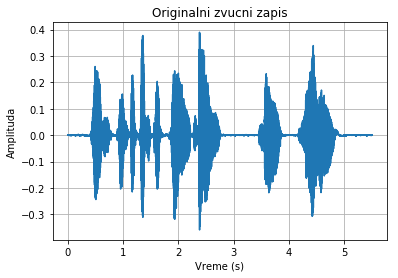

In [17]:
plt.plot(t, zvuk) #iscrtavamo zvuk na vremenskoj osi t
plt.grid() #ovom funkcijom iscrtavamo mrezu na grafiku
plt.xlabel("Vreme (s)") #ovom funkcijom ispisujemo naziv na x - osi
plt.ylabel("Amplituda") #ispisujemo naziv na y - osi
plt.title("Originalni zvucni zapis") #ispisujemo naslov grafika
plt.show() #ovom funkcijom sklanjamo neke sistemeske parametre koje Pajton prvo ispise a tek potom iscrta grafik

In [18]:
#3. CRTANJE SIGNALA U FREKVENCIJSKOM DOMENU

In [19]:
#Sledecom naredbom racunamo Furijeovu transformaciju nase promenlive zvuk.
#U promenljivu zvuk_X smestamo kompleksne komponente koji u sebi sadrze informaciju 
#o frekvencijskoj karakteristici koja nas zanima i koju zelimo da iscrtamo.
#Da bismo izracunali Furijeovu transformaciju signala zvuk koristimo sledecu naredbu:

zvuk_X = sp.fft(zvuk)

In [20]:
#Da vidimo sada sta nam je funkcija sp.fft(zvuk) upisala u promenljivu zvuk_X:

zvuk_X

array([-17.49066162+0.j        ,  -1.85225612+2.48612687j,
        -4.76977827+7.55465075j, ...,  -6.14645201-7.61864798j,
        -4.76977827-7.55465075j,  -1.85225612-2.48612687j])

In [21]:
#Vidimo da su u pitanju kompleksni brojevi. U svakom od ovih kompleksnih brojeva
#krije se informacija o delu frekvencijske karakteristike naseg signala.
#Iz teorije znamo da ako zelimo da odredimo amplitudsku karakteristiku signala
#tada treba da izracunamo moduo svakog od ovih kompleksnih brojeva, i to da iscrtamo.

#Medjutim, pre nego sto to ucinimo, hajde prvo da napravimo frekvencijsku osu.
#Samo da se podsetimo, amplitudska frekvencijska karakteristika koju hocemo 
#da iscrtamo za nas signal zvuk predstavlja zavisnost pojacanja (kompleksnih komponenti)
#od frekvencije.

In [22]:
#Da bismo napravili frekvencijsku osu koristimo naredbu:
# sp.linspace(pocetna_frekvencija,krajnja_frekvencija, broj_tacaka)

#Npr. fja sp.linspace(0,1,10) dace nam sledeci niz:
#array([ 0.,  0.111,  0.222,  0.333,  0.444, 0.555,  0.666,  0.777,  0.888,  1.])
#Dakle dobili smo 10 tacaka na x - osi (kod nas ce to biti frekvencija) od 0 do 1 sa jednakim medjusobnim rastojanjima
#(svaki sledeci broj se uvecava za jednak korak tj. za +0.111).

#Mi cemo u nasoj naredbi da ,,pravimo`` tacke na nasoj x - osi (frekv.) od 0 do Fs jer je tolika frekvencija odabiranja Fs
#(na primer ako smo neki signal odabirali sa 100Hz (100 puta u sekundi) ne ocekujemo da u odabiranom signalu
#nadjemo neku frekvencijsku komponentu od npr. 200Hz). 
#Za broj tacaka na jednakim rasotjanjima uzimamo duzinu promenljive X_zvuk (jer u odnosu na nju crtamo grafik)
#i dodajemo +1 da nam Pajton ne bi izbacivao gresku.

F = sp.linspace(0, Fs, len(zvuk_X) + 1)

In [23]:
#Ovom naredbom kazemo Pajtonu da iskopira ceo niz iz F sem poslednjeg elementa i upise ga ponovo u promenljivu F.
#Ovo takodje pisemo da bismo izbegli da nam Pajton izbaci gresku.

F = F[:-1]

In [24]:
#Sada dolazimo do vaznog dela. Pre nego sto iscrtamo nasu amplitudsku frekvencijsku karakteristiku treba da 
#obratimo paznju na jednu stvar: amplitudska karakteristika, odnosno njeni kompleskni brojevi cije module crtamo
#zbog same prirode Furijeove transformacije iscrtace nam preslikani spektar.
#Neka nam je npr. dat signal ciju smo Furijeovu transformaciju izracunali i hocemo da iscrtamo njegovu 
#amplitudsku karakteristiku, pri cemu nam je najvisa frekvencija u tom signalu npr. 200Hz.
#Kada bismo iscrtali njegovu frekvencijsku karakteristiku dobili bismo da je najvisa frekvencija 400Hz i imali bismo
#,,preslikanu`` sliku u ogledalu. Ovo je posledica same definicije Furijeove transformacije i zato je UVEK isctavamo
#do Fs/2! 

#Hajde sada to i ovde da ucinimo. Prvo cemo da vidimo koja nam je duzina nase promenljive sa Furijeovim kompleksnim komponentama:
N = len(zvuk_X)

#Sada iscrtavamo do N/2.

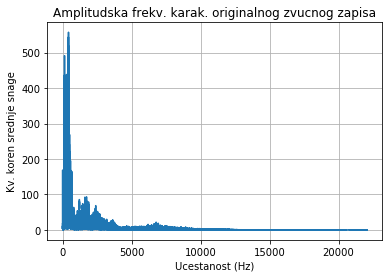

In [74]:
#Prvi argument nam je frekvencijska osa od 0 do N/2 (Fs/2), a drugi argument nam je moduo kompleksnih koeficijenata
#Da bismo ga dobili koristimo sledecu funkciju:
#sp.absolute(kompleksni_broj).

#Na primer za kompleksni broj 1 + 2*j pomenuta funkcija vraca njegov moduo (koren iz kvadrata zbira realnog i imaginarnog dela)
#Pisemo: sp.absolute(1 + 2j)
#A dobijamo: 2.2360679774997898
#Mozemo i rucno da proverimo: Re(1+2j) = 1 Im(1+2j) = 2
#Moduo = kvadratni_koren(Im^2+Re^2) = kvadratni_koren(1^2 + 2^2) = kvadratni_koren(1 + 4) = kvadratni_koren(5) = 2,23

plt.plot(F[0:round(N/2)], sp.absolute(zvuk_X[0:round(N/2)]))
plt.title("Amplitudska frekv. karak. originalnog zvucnog zapisa")
plt.xlabel("Ucestanost (Hz)")
plt.ylabel("Kv. koren srednje snage")
plt.grid()
plt.show()

In [26]:
#Ovim smo zavrsili 3. stavku. Pre nego sto predjemo na 4. pogledajmo ponovo gornji grafik.
#Iz teorije znamo (Parsevalova teorema) da ako kvadriramo vrednost kompleksnih komponenti (kvadriramo nase
# sp.absolute(zvuk_X[0:round(N/2)]) ) tada dobijamo srednju snagu singala. Ako je nacrtamo u zavisnosti od frekvencije
#dobijamo grafik gustine srednje snage (raspodelu srednje snage signala) u odnosu na frekvenciju signala.
#Drugim recima, opet bismo dobili isti grafik kao gore, pri cemu bi sada y - osa bila srednja snaga signala.
#Zasto nam je ovo vazno? Vazno nam je jer na taj nacin mozemo da zakljucimo na kojim intervalima frekvencije
#nam je sadrzana vecina snage signala, sto znaci zapravo gde nam je vecina korisnog signala smestena.
#Ovo cemo kasnije da koristimo kako bismo znali odakle treba da filtiramo signal na taj nacin da zadrzimo
#najveci moguci korisni deo signala.

#Hajde sada da vidimo gde se nama u ovom nasem signalu nalazi vecina korisnih informacija (tj. gde nam je najveca
# koncentracija srednje snage signala).

In [27]:
#Ako signal iscrtamo do njegovog 300000. dela dobijamo sledeci grafik: 

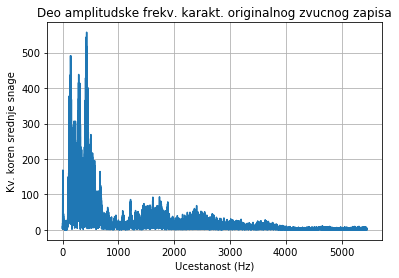

In [72]:
plt.plot(F[0:30000], sp.absolute(zvuk_X[0:30000]))
plt.title("Deo amplitudske frekv. karakt. originalnog zvucnog zapisa")
plt.xlabel("Ucestanost (Hz)")
plt.ylabel("Kv. koren srednje snage")
plt.grid()
plt.show()

#Sa ovog grafika vidimo da nam je srednja snaga najvise skoncentrisana od 0 do 5Khz.
#Ovo za sada ostavljamo ovako kako je, drzeci na umu da nam je vecina informacija sadrzana do 5KHz.

In [29]:
#Pre nego sto nastavimo dalje, hajde da sacuvamo nas originalni zvucni zapis.
#To cinimo funkcijom sf.write('putanja_na_racunaru', niz_sa_amplitudama, frekvenicja_odabiranja)
#Mi sve to imamo vec definisano gore tako da samo pisemo:

sf.write("C:/Users/Mateja/Desktop/zvuk_original.wav", zvuk, Fs)

In [30]:
#4. DODAVANJE GAUSOVOG SUMA

In [31]:
#Sum koji ovde dodajemo na nas zvucni signal je aproksimacija realnog suma.
#Naziva se BAGS ili Beli Aditivni Gausov Sum.
#U sustini, generisemo slucajne brojeve (sa Gausovom raspodelom) koje zatim mnozimo sa nekim k
#(njime definisemo amplitudu suma, koja ne sme buti veca od amplitude naseg zvucnog signala, inace necemo moci
#to posle da isfiltriramo).

In [32]:
#Dakle k znamo sta je, sada da vidimo kako da definisemo slucajne brojeve:

k = 0.03

#Sledecom naredbom generisemo onoliko slucajnih brojeva koliko ima amplituda u nizu naseg zvuka.
#Drugim recima, na celoj duzini naseg zvuka (vracamo se u vremenski domen!) jednostavno dodajemo (zato se zove aditivni) 
#slucajne brojeve:

summ = k*np.random.randn(len(zvuk))
zvuk_sum = zvuk + summ

In [33]:
#Sada cemo da iscrtamo zasumljen i originalan signal u vremenu, da bismo videli
#sta se dogodilo:

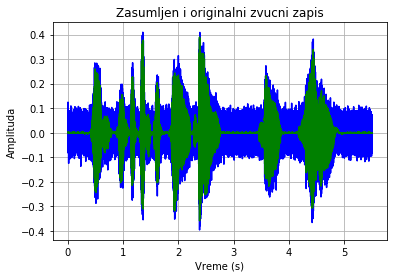

In [34]:
plt.plot(t, zvuk_sum, 'b')#Pajton crta plavom bojom zasumljen zvuk
plt.plot(t, zvuk, 'g')#Preko njega, zelenom bojom crta originalni zvuk
plt.grid()
plt.xlabel("Vreme (s)")
plt.ylabel("Amplituda")
plt.title("Zasumljen i originalni zvucni zapis")
plt.show()

#I dobijamo nas grafik. Tamno-plavom bojom prikazan je zasumljen signal, a zelenom originalni signal.
#Vidimo da je signal zasumljen na celoj svojoj duzini.

In [35]:
#Zapisujemo zasumljen zvucni zapis:

sf.write("C:/Users/Mateja/Desktop/zvuk_zasumljen.wav", zvuk_sum, Fs)

In [36]:
#Sada treba da definisemo nas LP filtar. Ovaj filtar ima samo dva parametra:
#fg - granicnu ucestanost (naziva se i ucestanost odsecanja - pojacanje 0 za f>fg)
#red filtra - oznacava kompleksnost matematicke funkcije koja zapravo obavlja posao
#filtiranja, za nas slucaj sasvim je dovoljno da uzmemo da filtar bude 5. reda.

#Medjutim postavlja se ovo pitanje:
#Koju vrednost treba da odaberemo za fg kako bismo sto bolje rekonstruisali nas originalni signal?
#Iz teorije je poznato da se za frekvencijski spektar ABGS uzima interval od 0 do +beskonacno, sto drugim recima znaci da
#ABGS ima frekvencijske komponente na svim ucestanostima. Kako mi koristimo jednostavan linearan filtar (linearan zbog 
#izgleda amplitudske karakteristike) jedino sto mi mozemo da uradimo jeste da nas zasumljeni signal od neke (fg) ucestanosti
#,,odsecemo``. Medjutim, i u tom nasem delu koji smo propustili idalje postoji sum. Sta sad da radimo? Sum je, ovako jednostavnim
#filtrom nemoguce u potpunosti eliminisati. Jednostavno, koji god frekvencijski opseg da izdvojimo iz naseg zasumljenog
#signala imacemo prisutan i sum. Sada nam u pomoc priskace informacija o raspodeli srednje snage naseg signala. Posto znamo
#da je vecina ,,korisnih`` informacija naseg signala sadrzana do 5KHz to znaci da negde u opsegu od 300Hz do 5Khz treba da 
#izvrsimo filtriranje. I u ovom opsegu ce naravno da postoji sum, ali ce biti dosta slabiji (uklonili smo mu vecinu njegovih
#,,korisnih`` informacija (a to je nazalost ceo spektar od 0 do + beskonacno)) pa ce nas koristan signal doci do izrazaja.
#Stoga, eksperimentalno utvrdjujemo da optimalne (prihvatljive) rezultate dobijamo za 3 granicne frekvenicije:
#1500Hz, 3500Hz, i 5000Hz.
#Dakle treba da napravimo tri LP filtra sa tri razlicite granicne frekvencije fg. Potom cemo tako ociscene zvucne zapise
# sacuvati i na kraju reprodukovati i na taj nacin videti dobre i lose strane savake od ove tri granicne ucestanosti.

In [37]:
#Definisemo 1,5 Khz LP filtar.
#Granicne ucestanosti racunamo kao fg/(Fs/2).

In [38]:
fg15 = [1500 / (Fs/2)]

In [39]:
#Prvo moramo da izracunamo koeficijente naseg filtra za ovako definisane parametre (5. red, LP, fg = 1500Hz)
#To cinimo sledecmo naredbom, koja nam vraca koeficijente b i a:

b, a = sig.butter(5, fg15, "lowpass") 

#Sada naredbom sig.lfilter kojoj prosledjujemo parametre b i a, kao i sam signal koji treba da filtriramo
#dobijamo nas prvi filtrirani signal:

zvuk_fil_15 = sig.lfilter(b, a, zvuk_sum)

In [40]:
#Signal zatim pojacavamo 4 puta jer je signal oslabljen usled nesavrsenosti karakteristike filtra.
#Ali pazimo da prevelikim pojacanjem signala ne izazovemo njegovu distorziju (izoblicenje):

In [41]:
zvuk_fil_15 = 4*zvuk_fil_15

In [42]:
#Crtamo amplitudsku karakteristiku ovog LP filtra:

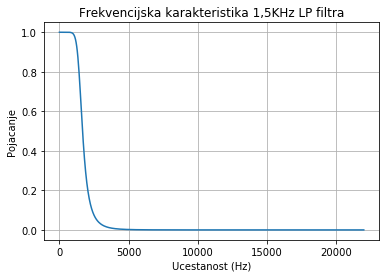

In [43]:
#Ovo cinimo sledecom funkcijom:
w, h = sig.freqz(b, a)
#Ona ima dva parametra : w (ugaona ucestanost u kojoj nam je skrivena informacija o ucestanosti)
#i h (pojacanje filtra - idealno 1, obratiti paznju ovo je kompleksni broj!)


#Da bismo dobili frekvenciju iz ugaone ucestanosti koristimo se sledecom formulom koja vazi izmedju
#kruzne ucestanosti i frekvencije:
#w = 2*pi*f --> f = (0.5*w)/pi
plt.plot((0.5*Fs / np.pi)*w, np.absolute(h))# koristimo np.absolute(h) kako bismo dobili moduo od h

plt.grid()
plt.title("Frekvencijska karakteristika 1,5KHz LP filtra")
plt.xlabel("Ucestanost (Hz)")
plt.ylabel("Pojacanje")
plt.show() 
#Dobijamo amplitudsku frekvencijsku karakteristiku LP filtra. Vidimo da on ima priblizno pojacanje 1 do 1500Hz a da
#potom za f>1500Hz pojacanje signala brzo pada na 0. Idealan LP filtar bi imao strmu karakteristiku (za f>1500Hz karakteristika
#bi trenutno ,,pala`` na nulu):

In [44]:
#Na kraju filtriran i pojacan signal cuvamo kao:
sf.write("C:/Users/Mateja/Desktop/zvuk_filtriran15.wav", zvuk_fil_15, Fs)

In [45]:
#Slede potpuno isto definisani LP filtri. Jedina razlika je u fg.

In [46]:
#Definisemo 3,5 Khz LP filtar

In [47]:
fg35 = [3500/(Fs/2)]

In [48]:
b, a = sig.butter(5, fg35, "lowpass") 
zvuk_fil_35 = sig.lfilter(b, a, zvuk_sum)

In [49]:
#Signal zatim pojacavamo 2.5 puta (pazimo da signal ne izoblicimo).

In [50]:
zvuk_fil_35 = 2.5*zvuk_fil_35

In [51]:
#Crtamo karakteristiku ovog LP filtra:

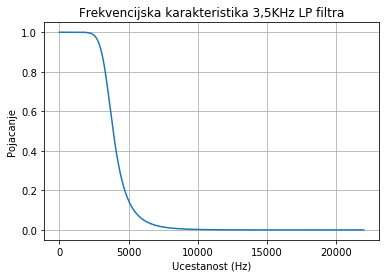

In [52]:
w, h = sig.freqz(b, a)

plt.plot((0.5*Fs / np.pi)*w, np.absolute(h))
plt.grid()
plt.title("Frekvencijska karakteristika 3,5KHz LP filtra")
plt.xlabel("Ucestanost (Hz)")
plt.ylabel("Pojacanje")
plt.show() 

In [53]:
sf.write("C:/Users/Mateja/Desktop/zvuk_filtriran35.wav", zvuk_fil_35, Fs)

In [54]:
#Definisemo 5 Khz LP filtar:

In [55]:
fg50 = [5000/(Fs/2)]

In [56]:
b,a=sig.butter(5, fg50, "lowpass") 
zvuk_fil_50 = sig.lfilter(b, a, zvuk_sum)

In [57]:
#Signal zatim pojacavamo 1.5 put (pazimo da ne izoblicimo signal):

In [58]:
zvuk_fil_50 = 1.5*zvuk_fil_50

In [59]:
#Crtamo karakteristiku ovog LP filtra:

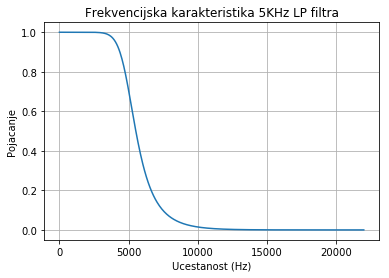

In [60]:
w, h = sig.freqz(b, a)

plt.plot((Fs * 0.5 / np.pi)*w, np.absolute(h))
plt.grid()
plt.title("Frekvencijska karakteristika 5KHz LP filtra")
plt.xlabel("Ucestanost (Hz)")
plt.ylabel("Pojacanje")
plt.show()

In [61]:
sf.write("C:/Users/Mateja/Desktop/zvuk_filtriran50.wav", zvuk_fil_50, Fs)